# Titanic Survival Predictions 


Content:

    Import Necessary Libraries
    Read & Explore the Data
    Data Visualization - to reach to a prediction based on train dataset
    Data Analysis
    Model selection
    Output file generation


# 1. Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [657]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [658]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read & Explore the Data
We will read in the data and and inspected it, we will now try to clean the data set and check values of columns. So let's start with some data manipulation, analysis, and visualisation to get various insights about the data.

We will be analysing noth given data set. 

In [832]:
# import csv file
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [768]:
# Checking the summary for the numeric columns in train data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [769]:
#columns in train dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [770]:
#read the head of the data or the first few rows of teh data

train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [771]:
#get column-wise info-

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### In line with the column-wise info we can further categorize the columns under mentioned below categories- 

**`Numerical Features: `** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)

**`Categorical Features:`** Survived, Sex, Embarked, Pclass

**`Alphanumeric Features:`** Ticket, Cabin

In [772]:
# We will check on the shape of the train data and see number of null data

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Train data Summary:

- We have 891 rows, we see most of columns without any null value
- Col Age has 177 null value, which is 19.8% of the total. Age should be an important field for survival, so we will try to fill up the missing data
- Col Cabin has 687 null values, which is 77.1%. Filling this up will be very difficult to fill in the data based on information so we will drop this column.
- Col Embarked feature has 0.22% of its values missing, which should be relatively harmless.
 

In [773]:

#check the summary of test data
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Rosenbaum, Miss. Edith Louise",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [774]:
# lets check the data type of the columns with total rows in each

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [775]:
# We will check null values

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Test Data Summary-
- We have details of 418 passengers
- We have 78% of Cabin details missing, so will drop this column
- we have 86 Age data missing, i.e 20% of the total. We will be fill this data
- there is just 1 null in Fare, which we will fill in the details.

# 3. Data Visualization - to reach to a prediction based on train dataset

### Visualise the survival rate based on sex of the passenger

Survival Percentage for Female passenger:  74.2
Survival Percentage for Male passenger:  18.89


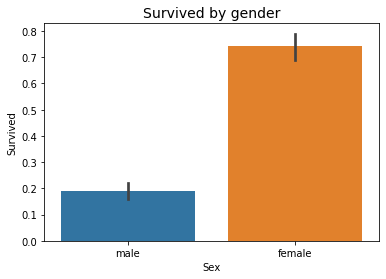

In [776]:
# we will draw a barplot to see the survival vs gender 

sns.barplot(x= train.Sex, y= train.Survived)
plt.title('Survived by gender', fontsize=14)

# Print the percentage details by gender
print('Survival Percentage for Female passenger: ', round(train.Survived[train.Sex=='female'].value_counts(normalize= True)[1]*100,2))
print('Survival Percentage for Male passenger: ', round(train.Survived[train.Sex=='male'].value_counts(normalize= True)[1]*100,2))

### Lets see the survival rate based on the PClass

Survival Percentage for PClass 1:  62.96
Survival Percentage for PClass 2:  47.28
Survival Percentage for PClass 3:  24.24


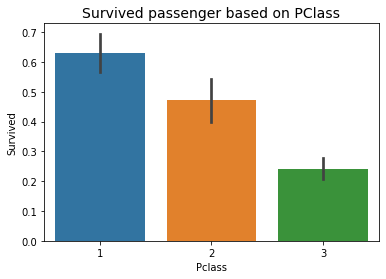

In [777]:
# plotting the plcass vs survival
sns.barplot(x= train.Pclass, y= train.Survived)
plt.title('Survived passenger based on PClass', fontsize= 14)

# Print the percentage details by PClass
print('Survival Percentage for PClass 1: ', round(train.Survived[train.Pclass==1].value_counts(normalize= True)[1]*100,2))
print('Survival Percentage for PClass 2: ', round(train.Survived[train.Pclass==2].value_counts(normalize= True)[1]*100,2))
print('Survival Percentage for PClass 3: ', round(train.Survived[train.Pclass==3].value_counts(normalize= True)[1]*100,2))

### Lets see the survival rate based on the Sibling/Spouce- SibSp details

Survival percentage with nos of accompanied sibling/spouce is 0 : 34.54
Survival percentage with nos of accompanied sibling/spouce is 1 : 53.59
Survival percentage with nos of accompanied sibling/spouce is 2 : 46.43
Survival percentage with nos of accompanied sibling/spouce is 3 : 25.0
Survival percentage with nos of accompanied sibling/spouce is 4 : 16.67


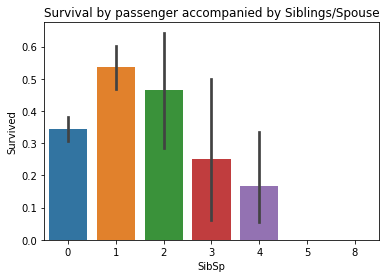

In [778]:
# plot SibSp survival details
sns.barplot(x= train.SibSp, y= train.Survived)
plt.title('Survival by passenger accompanied by Siblings/Spouse')

# Print the percentage details by gender
print('Survival percentage with nos of accompanied sibling/spouce is 0 :', round(train.Survived[train.SibSp==0].value_counts(normalize= True)[1]*100,2))
print('Survival percentage with nos of accompanied sibling/spouce is 1 :', round(train.Survived[train.SibSp==1].value_counts(normalize= True)[1]*100,2))
print('Survival percentage with nos of accompanied sibling/spouce is 2 :', round(train.Survived[train.SibSp==2].value_counts(normalize= True)[1]*100,2))
print('Survival percentage with nos of accompanied sibling/spouce is 3 :', round(train.Survived[train.SibSp==3].value_counts(normalize= True)[1]*100,2))
print('Survival percentage with nos of accompanied sibling/spouce is 4 :', round(train.Survived[train.SibSp==4].value_counts(normalize= True)[1]*100,2))

### Lets get the survival rate based on Parch (Nos of Parant/children) 

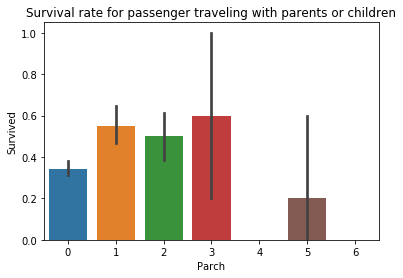

In [779]:
#first we will plot to see relation between survival and nos of parent or children accompanied
sns.barplot(x= train.Parch, y= train.Survived)
plt.title('Survival rate for passenger traveling with parents or children')
plt.show()

### Let's check the Age column and see if there has been any trend

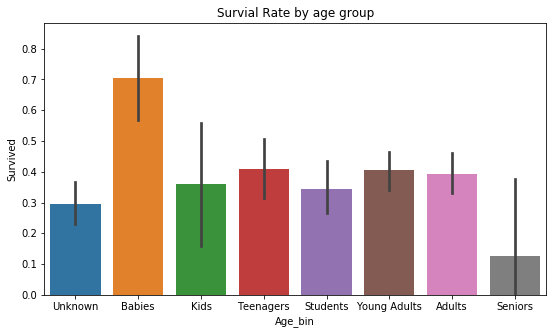

In [780]:
# As we might see a strong connection between Age and survival rate, we would fill in nul data at thi spoint with a negative number.
# Also, we would conduct similar editing on the test data too.

train.Age.fillna(0, inplace= True)
test.Age.fillna(0, inplace=True)

train['Age_bin']= pd.cut(train.Age, bins=[-1,0,5,12,19,24,35,65, np.inf], labels=['Unknown', 'Babies', 'Kids', 'Teenagers','Students','Young Adults', 'Adults','Seniors'])
test['Age_bin']= pd.cut(test.Age, bins=[-1,0,5,12,19,24,35,65, np.inf], labels=['Unknown', 'Babies', 'Kids', 'Teenagers','Students','Young Adults', 'Adults','Seniors'])

plt.figure(figsize= (9,5))
sns.barplot(x= train.Age_bin, y= train.Survived)
plt.title('Survial Rate by age group')
plt.show()


In [781]:
#once we have the age bins we can get rid of teh col Age from both data set

test.drop(columns='Age', inplace=True)
train.drop(columns='Age', inplace=True)

### Column Cabin

If we go through the data, we can see all mentioned Cabin details are of higher Pclass or we can say high in socioeconomic class.

Survival rate for Pasengers with mentioned Cabin Class:  66.67
Survival rate for Pasengers with Cabin Class missing:  29.99


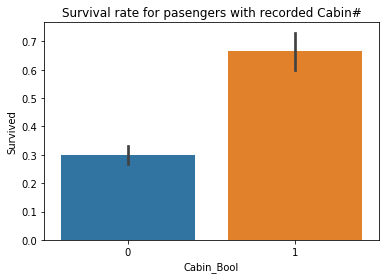

In [782]:
# Here we woulf create column to add 1/0 for values in Cabin field.
# Also, we would conduct similar editing on the test data too.

train['Cabin_Bool']= train.Cabin.notnull().astype('int')
test['Cabin_Bool']= test.Cabin.notnull().astype('int')

# now we can plot to see if there is a relation between Cabin details and survial
sns.barplot(x=train.Cabin_Bool, y= train.Survived)
plt.title('Survival rate for pasengers with recorded Cabin#')

# we can check the percentage of survival rate for Cabin details mentioned 
print('Survival rate for Pasengers with mentioned Cabin Class: ', round(train.Survived[train.Cabin_Bool==1].value_counts(normalize=True)[1]*100,2))
print('Survival rate for Pasengers with Cabin Class missing: ', round(train.Survived[train.Cabin_Bool==0].value_counts(normalize=True)[1]*100,2))

### Time for prediction based on train dataset

1. Female passengers are more likely to survive
2. Passenger travelling in PClass 1 or 1st class are more likely to survive. Survival percentage for a Pclass 1 passeger is more than double than that of a PClass3 or 3rd class passenger. 
3. Based on SibSp & Parch column details, we can conclude, passenger traveling alone has leser chance of survival. Survival of passenger accompanied by 1 or 2 sibling, spouse, parent or childern has high rates of survival in comparison
4. Babies has the highest chance of survival

# 4. Data Analysis
Now that we have loaded the dataset and inspected it, we will now try to clean the data set and check values of columns. So let's start with some data manipulation, analysis, and visualisation to get various insights about the data.

Let see what we have in test dataframe- structure, missing values and fill data whereever we need!

Lets begin with columns with missing values. Either we will delete these columns or will fill in data.

### Column- Cabin 

In [783]:
# As we have seen earlier, we have over 70% data for column Cabon missing. So we will go ahead and drop this column from both the datasets

train.drop(columns='Cabin', axis=1, inplace=True)
test.drop(columns='Cabin', axis=1, inplace=True)

### Column Embarkment

In [784]:
#we will first check on the common embarked value
train.Embarked.value_counts()

# will fill the missing ones with it. 

train.Embarked.fillna(train.Embarked.mode()[0], inplace= True)
test.Embarked.fillna(test.Embarked.mode()[0], inplace=True)

In [785]:
#we will also map numeric value to each embarkment locations for our analysis
dict_E= {'S':1,'C':2,'Q':3}

train.Embarked= train.Embarked.map(lambda x: dict_E[x])
test.Embarked= test.Embarked.map(lambda x: dict_E[x])


### Column Ticket

In [786]:
# we dont have any need of the Col - Ticket, so we will drop this column from noth the datasets

train.drop(columns='Ticket', axis=1, inplace=True)
test.drop(columns='Ticket', axis=1, inplace=True)

### Column Title and sex

In [787]:
# as we have seen in our prediction section there is a relation between age and survival rate, so we will go ahead and fill in data for the null values in column Age.
# in this case we cannot fill in data based on common value of the whole column but we can use median for that age group
# we need to first combine the data
combined_Data= [train, test]

for data in combined_Data:
    data['Title']= data.Name.str.extract('([A-Za-z]+)\.', expand= False)
    
    
# we can now see the title mix we have in the datasets
pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [788]:
# we will reduce title to common ones
for data in combined_Data:
    data['Title'].replace(['Capt', 'Col', 'Don', 'Dona', 'Dr','Jonkheer', 'Lady', 'Major','Rev'], 'Selective', inplace=True)
    data.Title.replace(['Countess','Lady','Sir'],'Special', inplace= True)
    data.Title.replace(['Mlle','Ms'],'Miss', inplace=True)
    data.Title.replace('Mme','Mrs', inplace=True)

train[['Title','Survived']].groupby(['Title'], as_index= False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Selective,0.285714
5,Special,1.000000


In [789]:
# next will map Title to numeric value for our analysis or model prediction purpose

dict_title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5, "Selective": 6}

train.Title= train.Title.map(lambda x: dict_title[x])
test.Title= test.Title.map(lambda x: dict_title[x])

In [790]:
#here we would find the average age by 6 category and accordingly fill in the null values

Mr_Age= train[train.Title== 1]['Age_bin'].mode()
Miss_Age= train[train.Title== 2]['Age_bin'].mode()
Mrs_Age= train[train.Title== 3]['Age_bin'].mode()
Master_Age= train[train.Title== 4]['Age_bin'].mode()
Royal_Age= train[train.Title== 5]['Age_bin'].mode()
Rare_Age= train[train.Title== 6]['Age_bin'].mode()

dict_ageMode= {1:Mr_Age, 2:Miss_Age, 3:Mrs_Age, 4:Master_Age, 5:Royal_Age, 6: Rare_Age}

In [791]:
# now we can map these age to the missing value

age_title_mapping = {1: "Adults", 2: "Students", 3: "Young Adults", 4: "Babies", 5: "Adults", 6: "Adults"}
dict_age_bin = {'Babies':1, 'Kids':2, 'Teenagers':3,'Students':4,'Young Adults':5, 'Adults':6,'Seniors':7}

for x in range(len(train["Age_bin"])):
    if (train.Age_bin[x]=='Unknown'):
        train.Age_bin=train.Age_bin.replace(train.Age_bin[x], age_title_mapping[train.Title[x]])
train.Age_bin= train.Age_bin.map(lambda x: dict_age_bin[x])


for x in range(len(test["Age_bin"])):
    if (test.Age_bin[x]=='Unknown'):
        test.Age_bin=test.Age_bin.replace(test.Age_bin[x], age_title_mapping[test.Title[x]])
test.Age_bin= test.Age_bin.map(lambda x: dict_age_bin[x])        
    

# we would change the data type to str ofr age_bin to avoid any category error while running statistical modeling later
#test.Age_bin= test.Age_bin.astype('str')
#train.Age_bin= test.Age_bin.astype('str')

In [792]:
# for our analysis purpose we would also map numeric values to the gender column
train.Sex= train.Sex.map({'male':1,'female':2})
test.Sex= test.Sex.map({'male':1,'female':2})

### Column Fare
we will fill in the missing data in col Fare and divide this column into some buckets

In [793]:
# fill the missing value

for x in range(len(test['Fare'])):
    if pd.isnull(test.Fare)[x]:
        test.Fare[x]= round(train[train.Pclass==test.Pclass[x]]['Fare'].mean(),4)

# lets divide the fare value into 3 groups 

train['Fare bin']= pd.cut(train.Fare, bins=3, labels=[1,2,3])
test['Fare bin']= pd.cut(test.Fare, bins=3, labels=[1,2,3])



In [794]:
# we can get rid of the Fare column as we have the fare bins

test.drop(columns='Fare', inplace=True)
train.drop(columns='Fare', inplace=True)

In [795]:
#  we can drop the name column as this would have no effect on our presiction or analysis
train.drop(columns='Name', inplace=True)

In [796]:
test.drop(columns='Name', inplace=True)

In [797]:
#finally lets check our train data set

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_bin,Cabin_Bool,Title,Fare bin
0,1,0,3,1,1,0,1,4,0,1,1
1,2,1,1,2,1,0,2,6,1,3,1
2,3,1,3,2,0,0,1,5,0,2,1
3,4,1,1,2,1,0,1,5,1,3,1
4,5,0,3,1,0,0,1,5,0,1,1


In [800]:
#finally lets check our test data set

test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Age_bin,Cabin_Bool,Title,Fare bin
0,892,3,1,0,0,3,5,0,1,1
1,893,3,2,1,0,1,6,0,3,1
2,894,2,1,0,0,3,6,0,1,1
3,895,3,1,0,0,1,5,0,1,1
4,896,3,2,1,1,1,4,0,3,1


# 5. Model selection

We would split up the train data and use that to test the accuracy of our selected model. We will use 20% of our train data set to check accurancy of different models

In [816]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived','PassengerId'], axis=1)
target = train['Survived']
x_train,x_val, y_train, y_val= train_test_split(predictors,target,test_size=.22, random_state=0)

Below mentioned are the models we will be testing for maximum accuracy.

    Gaussian Naive Bayes
    Logistic Regression
    Support Vector Machines
    Perceptron
    Decision Tree Classifier
    Random Forest Classifier
    KNN or k-Nearest Neighbors
    Stochastic Gradient Descent
    Gradient Boosting Classifier

we will test each of these models by feeding in 80% of train data and review prediction for 20% of the train data and thus check accuracy.

In [817]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [818]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.19


In [819]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [820]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

77.66


In [821]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

79.19


In [822]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

75.63


In [823]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

83.25


In [824]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.68


In [825]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

76.65


In [826]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.25


In [827]:
#lets put model details in dataframe for easier comparison
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,83.25
9,Gradient Boosting Classifier,83.25
0,Support Vector Machines,82.74
2,Logistic Regression,79.19
5,Perceptron,79.19
3,Random Forest,78.68
4,Naive Bayes,78.68
6,Linear SVC,77.66
8,Stochastic Gradient Descent,76.65
7,Decision Tree,75.63


# 6. Output file generation
#### I will be using KNN to for test data

In [829]:
# finally we will create a output file to check prediction

ids= test['PassengerId']
prediction= knn.predict(test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediction })
output.to_csv('output.csv', index=False)
